In [25]:
#ALGORTIMO RUTA MAS CORTA PARA TRANSITAR
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
class Vertice:
    def __init__(self, id):
        self.id = id
        self.vecinos = {}
        self.visitado = False
        self.padre = None
        self.distancia = float('inf')

    def agregarVecino(self, id, p, sentido):
        if id not in self.vecinos:
            self.vecinos[id] = {'peso': p, 'sentido': sentido}

class Grafica:
    def __init__(self):
        self.vertices = {}

    def agregarVertice(self, a):
        if a not in self.vertices:
            self.vertices[a] = Vertice(a)
        return a

    def agregarArista(self, a, b, p, sentido):
        if a in self.vertices and b in self.vertices:
            self.vertices[a].agregarVecino(b, p, sentido)
            self.vertices[b].agregarVecino(a, p, sentido)

    def camino(self, a, b, sentido_requerido,sentido_ayuda):
        camino = []
        actual = b

        while actual != None:
            camino.insert(0, actual)
            actual = self.vertices[actual].padre

        print(f"La ruta más corta para llegar de {a} a {b} es:")

        c = 0
        while c + 1 < len(camino) and camino[c + 1] is not None:
            vecino_actual = camino[c]
            vecino_siguiente = camino[c + 1]
            sentido = self.vertices[vecino_actual].vecinos[vecino_siguiente]['sentido']
            
            if sentido==sentido_requerido or sentido==sentido_ayuda :  # Verifica el sentido requerido
                print(f"\n{c}) Luego ir de {vecino_actual} hacia {vecino_siguiente} ({sentido})\n")
                c += 1
            else:
                print(f"\n{c}) No es posible ir de {vecino_actual} hacia {vecino_siguiente} en el sentido requerido.\n")
                camino.pop(c + 1)  # Elimina el vértice con sentido incorrecto
                c += 1

        print("\n", camino)
        print(f"CON UNA DISTANCIA DE {self.vertices[b].distancia} metros.")

    def minimo(self, noVisitRest):
        if len(noVisitRest) > 0:
            m = self.vertices[noVisitRest[0]].distancia
            id = noVisitRest[0]

            for e in noVisitRest:
                if m > self.vertices[e].distancia:
                    m = self.vertices[e].distancia
                    id = e

            return id

    def dijkstra(self, grafo, a, sentido_requerido,sentido_ayuda):
        if a in self.vertices:
            self.vertices[a].distancia = 0
            actual = a
            noVisitados = []

            for v in self.vertices:
                if v != a:
                    self.vertices[v].distancia = float('inf')
                self.vertices[v].padre = None
                noVisitados.append(v)

            while len(noVisitados) > 0:
                for vecino in grafo.neighbors(actual):
                    if self.vertices[vecino].visitado == False:
                        peso = grafo[actual][vecino]['peso']
                        sentido = grafo[actual][vecino]['sentido']

                        if sentido == sentido_requerido or sentido == sentido_ayuda:  # Verifica el sentido requerido o el de ayuda
                            if self.vertices[actual].distancia + peso < self.vertices[vecino].distancia:
                                self.vertices[vecino].distancia = self.vertices[actual].distancia + peso
                                self.vertices[vecino].padre = actual

                self.vertices[actual].visitado = True
                noVisitados.remove(actual)

                actual = self.minimo(noVisitados)
        else:
            return False


df = pd.read_csv('ciudadJardinMapa.csv')
CALLES = nx.from_pandas_edgelist(df, source='origen', target='destino', edge_attr=['peso', 'sentido'])
g = Grafica()

# Agrega los vértices y aristas al grafo g a partir de METRO
for edge in CALLES.edges(data=True):
    a = edge[0]
    b = edge[1]
    peso = edge[2]['peso']
    sentido = edge[2]['sentido']
    g.agregarVertice(a)
    g.agregarVertice(b)
    g.agregarArista(a, b, peso, sentido)

nodo_inicio = 'casuarinas con tulipanes'  # Reemplaza con el nodo de inicio que desees
nodo_final = 'calle country con tulipanes'
sentido_requerido = 'derecha izquierda'  # Reemplaza con el sentido requerido
sentido_ayuda= 'derecha'

g.dijkstra(CALLES, nodo_inicio, sentido_requerido,sentido_ayuda)
g.camino(nodo_inicio, nodo_final, sentido_requerido,sentido_ayuda)


La ruta más corta para llegar de casuarinas con tulipanes a calle country con tulipanes es:

0) Luego ir de casuarinas con tulipanes hacia magnolias con tulipanes (derecha izquierda)


1) Luego ir de magnolias con tulipanes hacia ficus con tulipanes (derecha izquierda)


2) Luego ir de ficus con tulipanes hacia calle country con tulipanes (derecha izquierda)


 ['casuarinas con tulipanes', 'magnolias con tulipanes', 'ficus con tulipanes', 'calle country con tulipanes']
CON UNA DISTANCIA DE 487.13 metros.


(-0.8249654813947394,
 0.9807667769053702,
 -1.1656544160095221,
 1.2057861662271492)

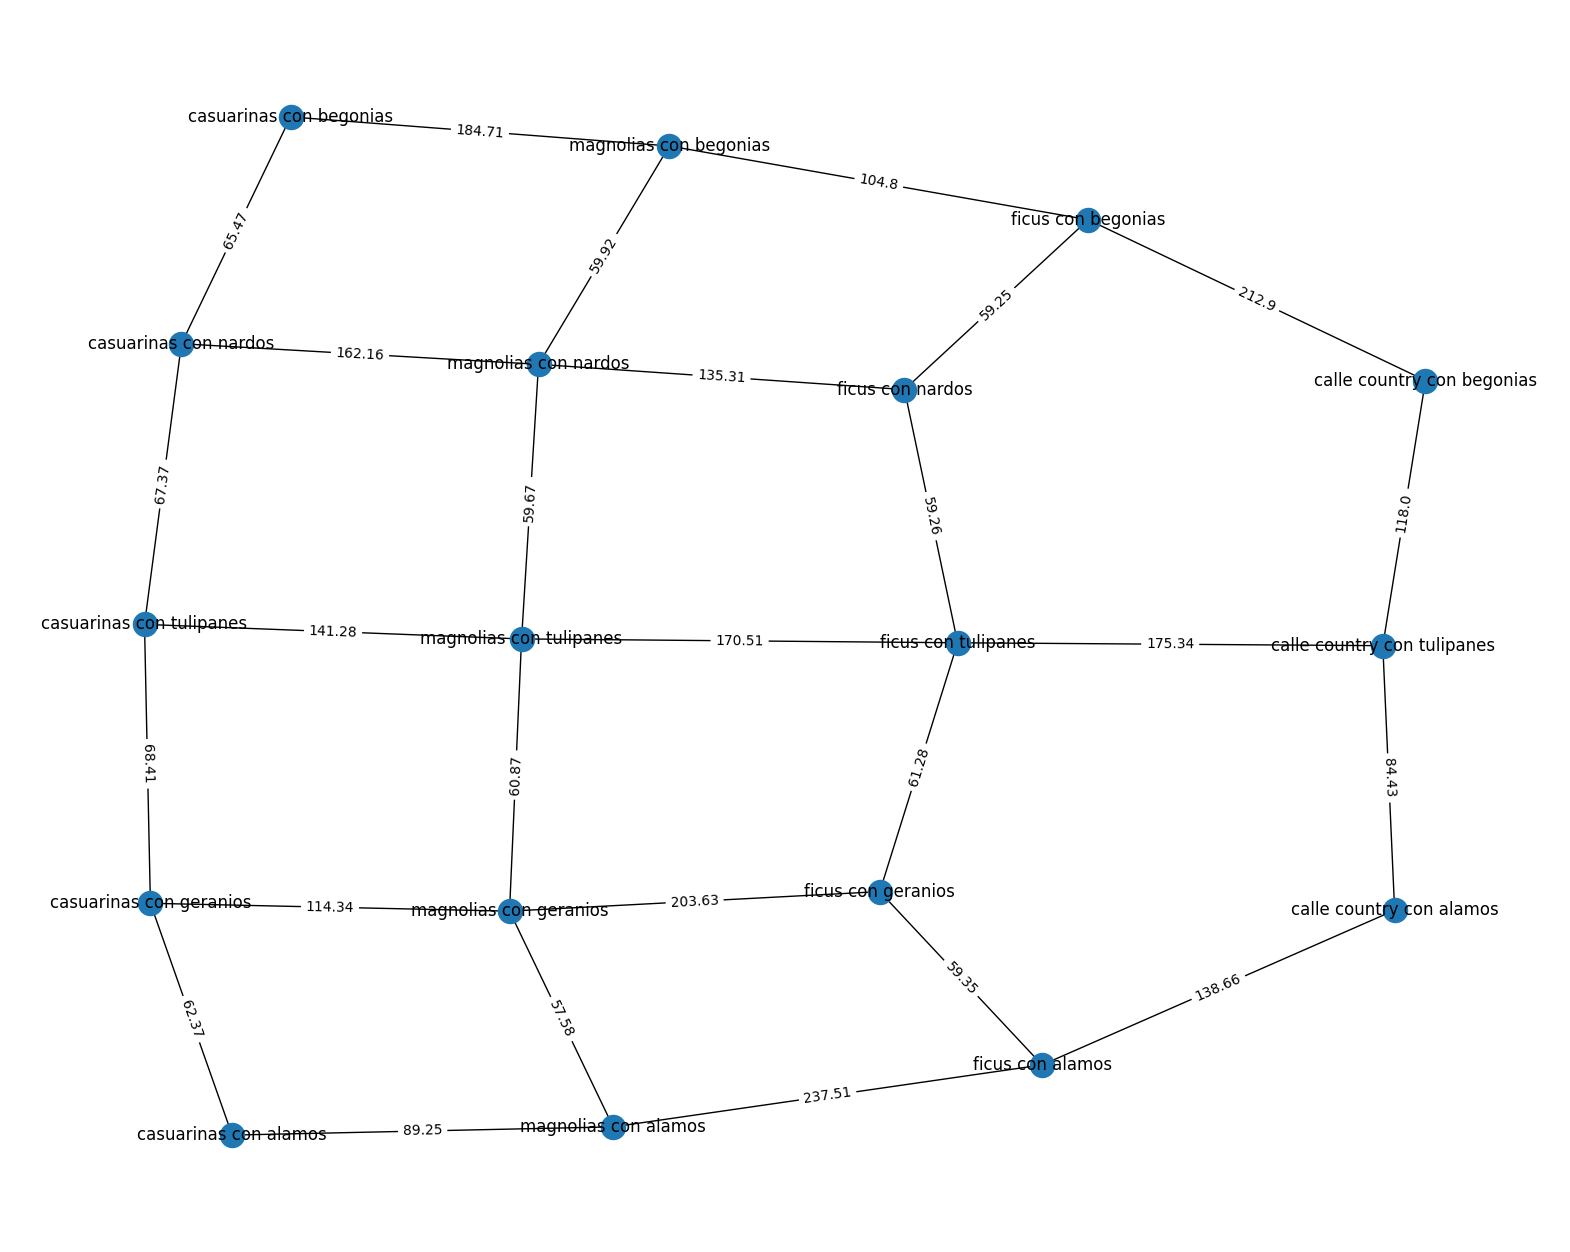

In [26]:
#nx.draw(CALLES,with_labels=True)
# defino el algoritmo de diseño
pos = nx.spring_layout(CALLES, seed=50)
plt.figure(figsize=(20,16 ))
# Dibuja el grafo con las etiquetas de los nodos
nx.draw_networkx(CALLES, pos, with_labels=True)

# Agrega etiquetas a las aristas con las distancias
edge_labels = nx.get_edge_attributes(CALLES, 'peso')

nx.draw_networkx_edge_labels(CALLES, pos, edge_labels=edge_labels)

plt.axis('off')


{('calle country con tulipanes',
  'ficus con tulipanes'): Text(-0.2005684483060319, -0.42781415742224466, '175.34'),
 ('casuarinas con tulipanes',
  'magnolias con tulipanes'): Text(0.1655988407573357, 0.35361481218038116, '141.28'),
 ('magnolias con tulipanes',
  'ficus con tulipanes'): Text(-0.014263583358568005, -0.025706260771811013, '170.51')}

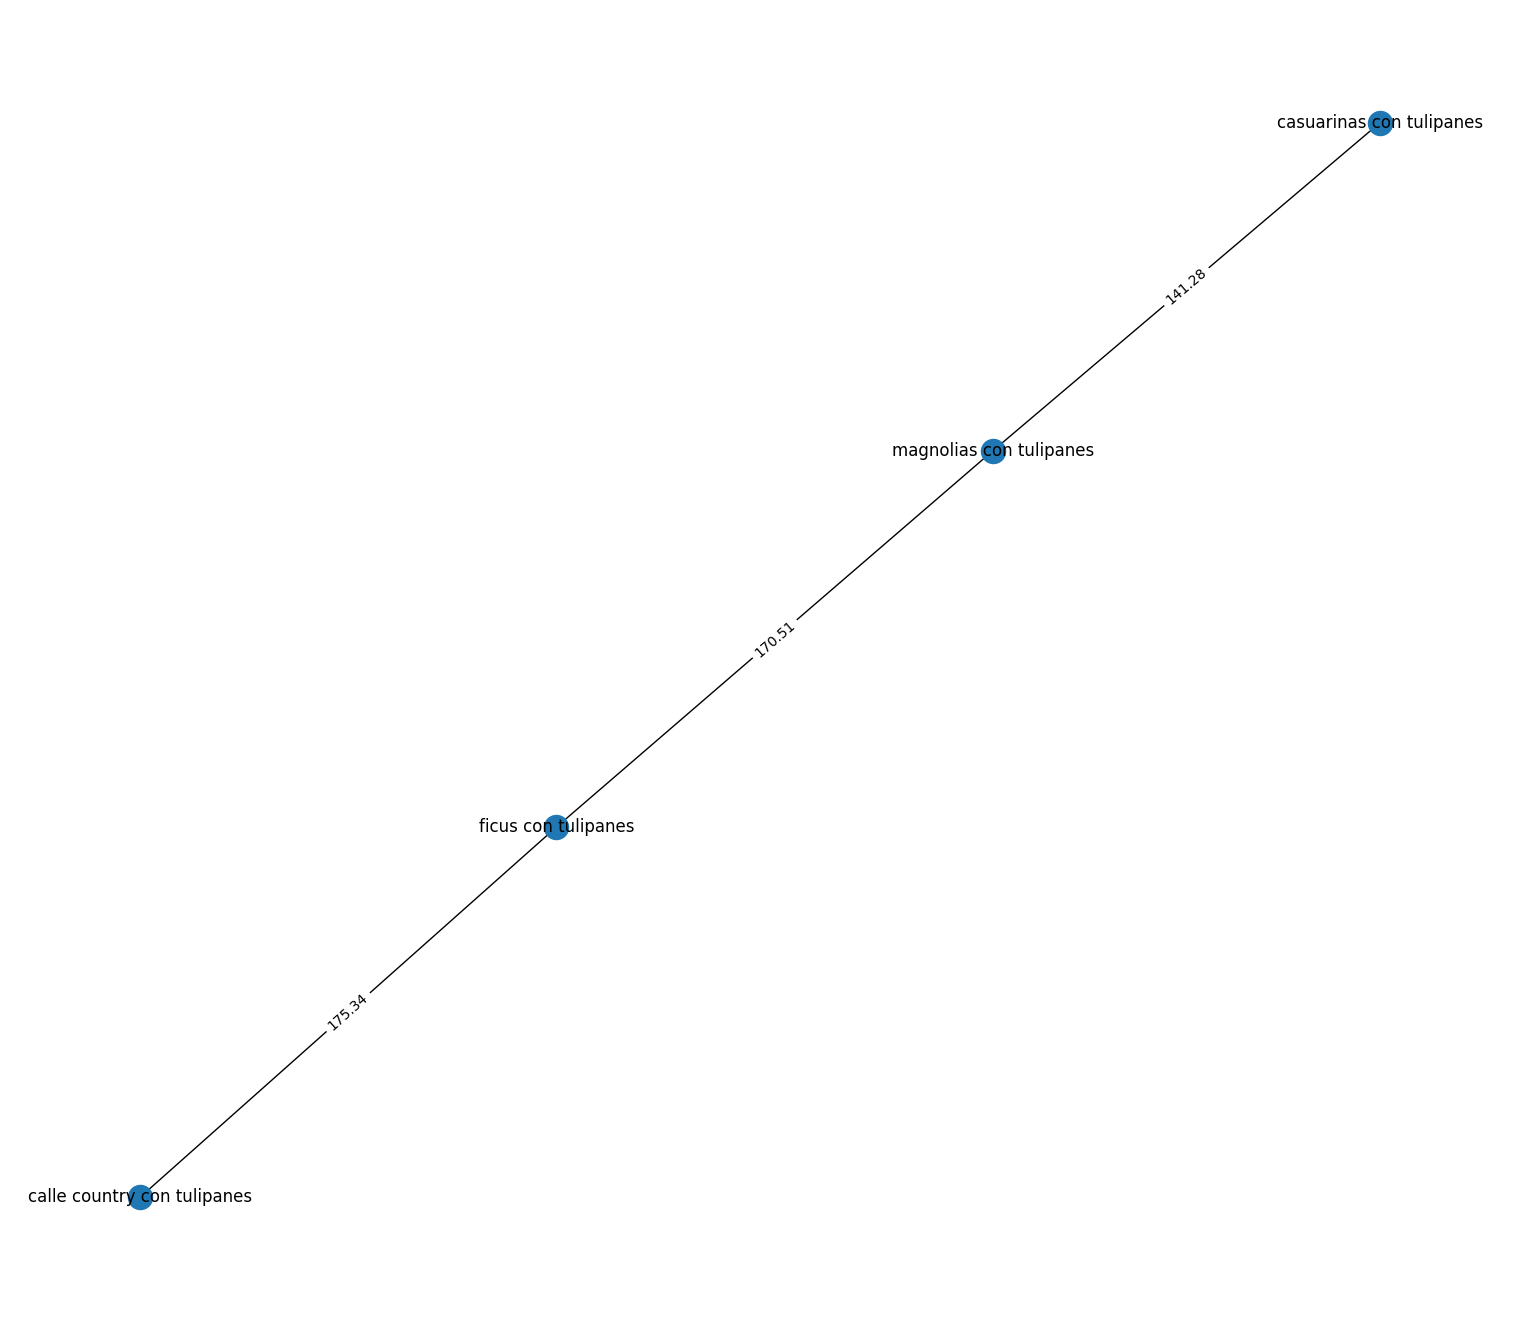

In [28]:
# aqui defino el algoritmo de diseño
pos_principal = nx.spring_layout(CALLES, seed=42)

#modificar la lista cada vez que la primera celda arroje el camino mas corto
selected_nodes = ['casuarinas con tulipanes', 'magnolias con tulipanes', 'ficus con tulipanes', 'calle country con tulipanes']

# creo el nuevo grafo con los nodos seleccionados
nuevo_grafo = CALLES.subgraph(selected_nodes)

# asigno las posiciones del grafo principal al nuevo grafo
pos_nuevo = {node: pos_principal[node] for node in selected_nodes}
nx.set_node_attributes(nuevo_grafo, pos_nuevo, 'pos')

plt.figure(figsize=(15,13))
# dibujo el nuevo grafo con las posiciones del grafo principal y las etiquetas de los nodos
nx.draw(nuevo_grafo, pos_nuevo, with_labels=True)

# agrego etiquetas a las aristas con las distancias
edge_labels = nx.get_edge_attributes(nuevo_grafo, 'peso')
nx.draw_networkx_edge_labels(nuevo_grafo, pos_nuevo, edge_labels=edge_labels)